In [23]:
# 02_preprocessing.ipynb

# Author: Eryk Urbański
# Date: April 2025
# Description: Load raw EEG data, perform filtering, add artificial noise.

# Import packages

In [1]:
import pickle
import numpy as np
import pandas as pd

# Load datasets

### Load EEGBCI data

In [2]:
with open("../data/eeg_datasets.pkl", "rb") as f:
    eeg_datasets_dict = pickle.load(f)
    
datasets = eeg_datasets_dict["datasets"]

eegbci_dataset = next((d for d in datasets if d["name"] == "eegbci"), None)
if eegbci_dataset:
    print("Found:", eegbci_dataset)
else:
    print("Not found.")

original_eegbci_data = eegbci_dataset["data"]
original_eegbci_times = eegbci_dataset["times"]
original_eegbci_channel_names = eegbci_dataset["ch_names"]
original_eegbci_data_df = pd.DataFrame(original_eegbci_data.T, columns=original_eegbci_channel_names)
original_eegbci_data_df.head(5)

Found: {'name': 'eegbci', 'data': array([[-5.0e-06, -1.2e-05, -7.7e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 2.0e-06, -2.4e-05, -7.8e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 3.7e-05,  1.0e-06, -5.9e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       ...,
       [-4.8e-05, -4.2e-05, -4.2e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [-3.9e-05, -3.1e-05, -2.9e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00],
       [-3.9e-05, -3.4e-05, -2.7e-05, ...,  0.0e+00,  0.0e+00,  0.0e+00]]), 'times': array([0.0000000e+00, 6.2500000e-03, 1.2500000e-02, ..., 1.2498125e+02,
       1.2498750e+02, 1.2499375e+02]), 'ch_names': ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz

,FC5,FC3,FC1,FCz,FC2,FC4,FC6,C5,C3,C1,...,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,Iz
0,-0.000005,0.000002,0.000037,0.000039,0.000030,0.000026,-0.000016,-0.000014,0.000004,0.000018,...,-0.000021,-0.000008,-0.000035,-0.000045,-0.000066,-0.000039,-0.000033,-0.000048,-0.000039,-0.000039
1,-0.000012,-0.000024,0.000001,-0.000002,-0.000015,-0.000022,-0.000055,-0.000036,-0.000027,-0.000025,...,-0.000050,-0.000040,-0.000068,-0.000065,-0.000084,-0.000052,-0.000021,-0.000042,-0.000031,-0.000034
2,-0.000077,-0.000078,-0.000059,-0.000065,-0.000063,-0.000055,-0.000067,-0.000088,-0.000071,-0.000065,...,-0.000017,-0.000022,-0.000050,-0.000035,-0.000048,-0.000018,-0.000020,-0.000042,-0.000029,-0.000027
3,-0.000066,-0.000067,-0.000050,-0.000065,-0.000060,-0.000055,-0.000068,-0.000062,-0.000053,-0.000054,...,-0.000039,-0.000060,-0.000078,-0.000064,-0.000068,-0.000041,-0.000044,-0.000062,-0.000034,-0.000043
4,-0.000045,-0.000055,-0.000033,-0.000053,-0.000054,-0.000063,-0.000083,-0.000052,-0.000050,-0.000053,...,-0.000044,-0.000055,-0.000070,-0.000054,-0.000063,-0.000037,-0.000060,-0.000070,-0.000034,-0.000045


### Load PhysioNet dataset

In [26]:
# TODO

# Add artificial noise

In [3]:
datasets_artnoise = []

In [4]:
noise_ratio = 0.8 # to be adjusted
for dataset in datasets:
    signal_std = np.std(dataset["data"])
    noise_std = signal_std * noise_ratio

    noisy_data = dataset["data"] + np.random.normal(0.0, noise_std, size=dataset["data"].shape)
    noisy_dataset_dict = {
        "name": dataset["name"],
        "noisy_data": noisy_data
    }
    datasets_artnoise.append(noisy_dataset_dict)

In [5]:
dataset_df = pd.DataFrame(datasets[0]["data"].T, columns=datasets[0]["ch_names"])
dataset_artnoise_df = pd.DataFrame(datasets_artnoise[0]["noisy_data"].T, columns=datasets[0]["ch_names"])
dataset_df.iloc[500:5000:1000, :10]

,FC5,FC3,FC1,FCz,FC2,FC4,FC6,C5,C3,C1
500,0.000080,0.000059,0.000068,0.000083,0.000068,0.000043,0.000038,0.000029,0.000030,0.000016
1500,-0.000054,-0.000041,-0.000061,-0.000066,-0.000061,-0.000051,-0.000061,-0.000051,-0.000057,-0.000059
2500,0.000013,-0.000010,-0.000004,-0.000022,-0.000036,-0.000044,-0.000049,0.000005,-0.000002,-0.000008
3500,-0.000063,-0.000041,-0.000017,-0.000007,-0.000017,-0.000025,-0.000005,-0.000070,-0.000038,-0.000021
4500,0.000021,0.000031,0.000048,0.000045,0.000036,0.000025,0.000017,0.000018,0.000017,0.000016


In [6]:
dataset_artnoise_df.iloc[500:5000:1000, :10]

,FC5,FC3,FC1,FCz,FC2,FC4,FC6,C5,C3,C1
500,0.000072,0.000069,0.000102,0.000155,0.000084,0.000044,0.000082,0.000037,-1.973488e-07,-3.051542e-06
1500,-0.000098,-0.000049,-0.000083,-0.000114,0.000034,-0.000035,-0.000103,-0.000088,-8.375288e-05,-6.923823e-05
2500,-0.000006,-0.000004,-0.000041,0.000047,-0.000083,-0.000087,-0.000031,0.000045,4.554827e-05,1.002034e-05
3500,-0.000110,-0.000075,-0.000029,0.000030,-0.000002,-0.000059,0.000027,-0.000055,-3.159235e-05,-8.184888e-05
4500,0.000038,-0.000016,0.000056,0.000111,-0.000011,-0.000043,-0.000031,-0.000018,2.651120e-05,4.739618e-07


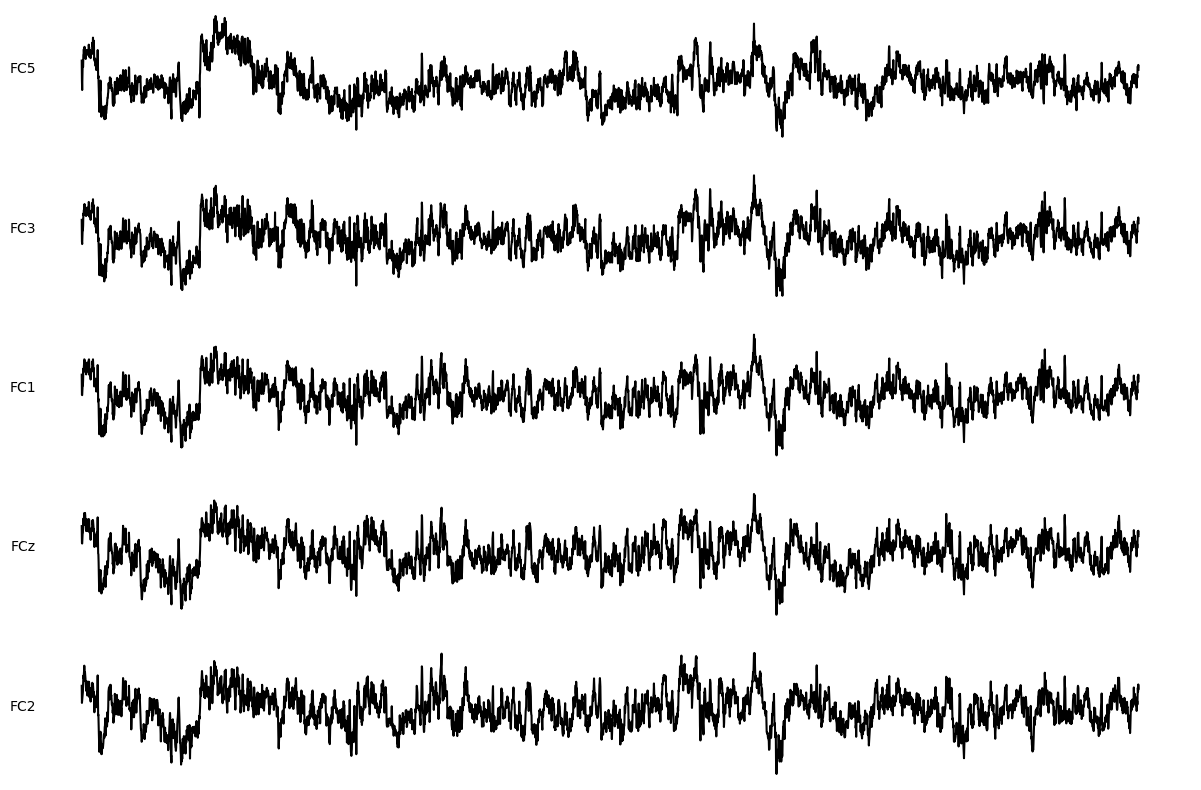

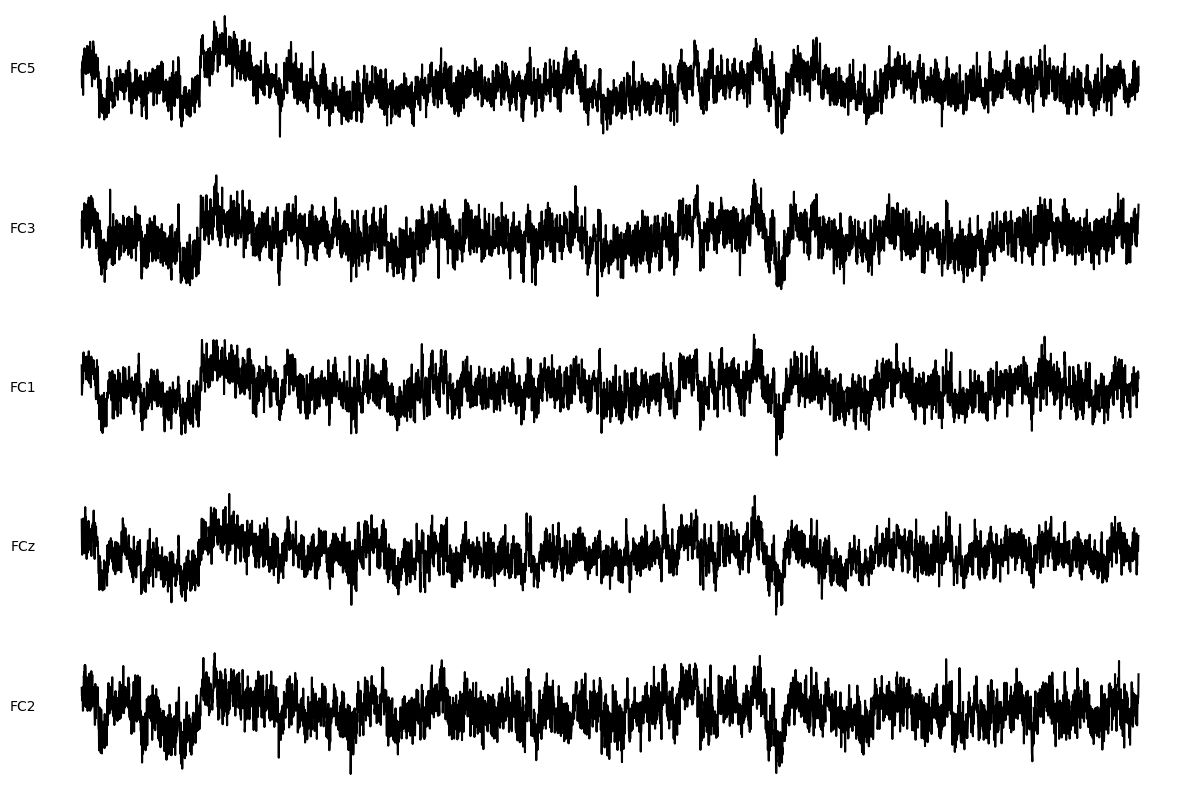

In [7]:
import sys
sys.path.append("../src")
from vis import plot_eeg

plot_eeg(pd.DataFrame(original_eegbci_data_df.iloc[500:5000, :]), 5)
plot_eeg(dataset_artnoise_df.iloc[500:5000, :], 5)

# Save data to pkl

In [8]:
with open("../data/eeg_datasets.pkl", "wb") as f:
    pickle.dump({"datasets": datasets, "datasets_artnoise": datasets_artnoise}, f)